# Expert scores analysis

I used this for development of the proper thing. The actual script is inside the "scripts" folder.

## Data loading and preprocessing

In [1]:
import pandas as pd
from scipy.stats import pearsonr, ttest_ind
import matplotlib.pyplot as plt

In [2]:
def get_quick_df_info(df: pd.DataFrame) -> None:
    print(df.info())
    print(df.describe())
    print(df.head())

In [3]:
expert_df = pd.read_csv("csv/expert_scores.csv")
get_quick_df_info(expert_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   group       891 non-null    int64  
 1   expert      891 non-null    int64  
 2   innovation  880 non-null    float64
 3   aesthetics  885 non-null    float64
 4   value       883 non-null    float64
 5   surprise    891 non-null    float64
dtypes: float64(4), int64(2)
memory usage: 41.9 KB
None
            group      expert  innovation  aesthetics       value    surprise
count  891.000000  891.000000  880.000000  885.000000  883.000000  891.000000
mean    14.000000   17.000000    3.303409    3.281356    3.238958    2.858586
std      7.793256    9.527252    1.074045    1.122045    1.040332    1.083161
min      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000
25%      7.000000    9.000000    3.000000    3.000000    3.000000    2.000000
50%     14.000000   17.000000    3.000000   

In [4]:
sim_df = pd.read_csv("csv/all_similarities_with_srcs.csv")
get_quick_df_info(sim_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8620 entries, 0 to 8619
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Final_Submission     8620 non-null   object 
 1   Inspiration          8620 non-null   object 
 2   Color_Similarity     8620 non-null   float64
 3   ResNet_Similarity    8620 non-null   float64
 4   Dino_Similarity      8620 non-null   float64
 5   Contrast_Similarity  8620 non-null   float64
 6   Source               8620 non-null   object 
dtypes: float64(4), object(3)
memory usage: 471.5+ KB
None
       Color_Similarity  ResNet_Similarity  Dino_Similarity  \
count       8620.000000        8620.000000      8620.000000   
mean           0.706947           0.559097         0.392660   
std            0.143967           0.160591         0.199151   
min            0.000000           0.000000         0.000000   
25%            0.618609           0.451399         0.240312   
50%    

In [5]:
score_cols = ["aesthetics", "value", "innovation", "surprise"]
expert_df_clean = expert_df.dropna(subset=score_cols)
get_quick_df_info(expert_df_clean)

<class 'pandas.core.frame.DataFrame'>
Index: 869 entries, 0 to 890
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   group       869 non-null    int64  
 1   expert      869 non-null    int64  
 2   innovation  869 non-null    float64
 3   aesthetics  869 non-null    float64
 4   value       869 non-null    float64
 5   surprise    869 non-null    float64
dtypes: float64(4), int64(2)
memory usage: 47.5 KB
None
            group      expert  innovation  aesthetics       value    surprise
count  869.000000  869.000000  869.000000  869.000000  869.000000  869.000000
mean    14.041427   16.752589    3.303797    3.273878    3.240506    2.863061
std      7.791679    9.472237    1.077524    1.125130    1.044369    1.083339
min      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000
25%      7.000000    9.000000    3.000000    2.000000    3.000000    2.000000
50%     14.000000   17.000000    3.000000    3.00

In [6]:
sim_df_clean = sim_df.dropna(subset=["Color_Similarity", 
                                     "ResNet_Similarity", 
                                     "Dino_Similarity", 
                                     "Contrast_Similarity"])
def extract_group_name(filename) -> str:
    return filename.split("_")[0]

sim_df_clean['Group'] = sim_df_clean['Final_Submission'].apply(extract_group_name)
sim_df_clean = sim_df_clean.astype({'Group': 'int64'})
get_quick_df_info(sim_df_clean)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8620 entries, 0 to 8619
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Final_Submission     8620 non-null   object 
 1   Inspiration          8620 non-null   object 
 2   Color_Similarity     8620 non-null   float64
 3   ResNet_Similarity    8620 non-null   float64
 4   Dino_Similarity      8620 non-null   float64
 5   Contrast_Similarity  8620 non-null   float64
 6   Source               8620 non-null   object 
 7   Group                8620 non-null   int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 538.9+ KB
None
       Color_Similarity  ResNet_Similarity  Dino_Similarity  \
count       8620.000000        8620.000000      8620.000000   
mean           0.706947           0.559097         0.392660   
std            0.143967           0.160591         0.199151   
min            0.000000           0.000000         0.000000   
25%       

## Data aggregation

In [7]:
expert_group = expert_df_clean.groupby("group").agg({'aesthetics': 'mean'}).reset_index()
expert_group

,group,aesthetics
0,1,4.161290
1,2,4.125000
2,3,3.606061
3,4,4.030303
4,5,2.741935
5,6,2.812500
6,7,2.909091
7,8,3.193548
8,9,2.875000
9,10,2.375000


In [8]:
# Aggregate a given similarity metric per group and per Source (AI vs. WEB).
sim_group = sim_df_clean.groupby(['Group', 'Source']).agg({'Dino_Similarity': 'mean'}).reset_index()
sim_group

,Group,Source,Dino_Similarity
0,1,AI,0.559656
1,1,Web,0.500404
2,2,AI,0.423790
3,2,Web,0.412840
4,3,AI,0.471511
5,3,Web,0.441676
6,4,AI,0.427364
7,4,Web,0.444562
8,5,AI,0.458750
9,5,Web,0.452371


In [9]:
# Pivot the similarity data so that each group has a separate column for each Source.
sim_pivot = sim_group.pivot(index='Group', columns='Source', values='Dino_Similarity').reset_index()
sim_pivot.columns.name = None  # Remove pivot index name
sim_pivot

,Group,AI,Web
0,1,0.559656,0.500404
1,2,0.423790,0.412840
2,3,0.471511,0.441676
3,4,0.427364,0.444562
4,5,0.458750,0.452371
5,6,0.491834,0.399779
6,7,0.537653,0.511216
7,8,0.423724,0.381199
8,9,0.481419,0.379749
9,10,0.575849,0.400765


In [10]:
get_quick_df_info(expert_group)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   group       27 non-null     int64  
 1   aesthetics  27 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 564.0 bytes
None
           group  aesthetics
count  27.000000   27.000000
mean   14.000000    3.273436
std     7.937254    0.589944
min     1.000000    2.218750
25%     7.500000    2.861742
50%    14.000000    3.312500
75%    20.500000    3.741935
max    27.000000    4.272727
   group  aesthetics
0      1    4.161290
1      2    4.125000
2      3    3.606061
3      4    4.030303
4      5    2.741935


In [11]:
get_quick_df_info(sim_pivot)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Group   26 non-null     int64  
 1   AI      26 non-null     float64
 2   Web     26 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 756.0 bytes
None
           Group         AI        Web
count  26.000000  26.000000  26.000000
mean   13.538462   0.435216   0.365413
std     7.716117   0.077619   0.071818
min     1.000000   0.248143   0.240860
25%     7.250000   0.395036   0.310598
50%    13.500000   0.440358   0.367914
75%    19.750000   0.489562   0.403244
max    27.000000   0.575849   0.511216
   Group        AI       Web
0      1  0.559656  0.500404
1      2  0.423790  0.412840
2      3  0.471511  0.441676
3      4  0.427364  0.444562
4      5  0.458750  0.452371


In [12]:
# Merge expert scores (per group) with the similarity scores.
merged_df = pd.merge(expert_group, sim_pivot, left_on="group", right_on="Group", how="inner")
merged_df.drop(columns=["Group"], inplace=True)
merged_df

,group,aesthetics,AI,Web
0,1,4.161290,0.559656,0.500404
1,2,4.125000,0.423790,0.412840
2,3,3.606061,0.471511,0.441676
3,4,4.030303,0.427364,0.444562
4,5,2.741935,0.458750,0.452371
5,6,2.812500,0.491834,0.399779
6,7,2.909091,0.537653,0.511216
7,8,3.193548,0.423724,0.381199
8,9,2.875000,0.481419,0.379749
9,10,2.375000,0.575849,0.400765


## Analysis

### Correlation

In [13]:
ai_valid = merged_df.dropna(subset=["AI"])
pearson_ai, p_value_ai = pearsonr(ai_valid['aesthetics'], ai_valid["AI"])
print("Correlation between aesthetics and AI Dino_Similarity:")
print(f"Pearson Correlation: {pearson_ai:.3f}, p-value: {p_value_ai:.3f}")

Correlation between aesthetics and AI Dino_Similarity:
Pearson Correlation: -0.011, p-value: 0.956


In [14]:
web_valid = merged_df.dropna(subset=["Web"])
pearson_web, p_value_web = pearsonr(web_valid['aesthetics'], web_valid["Web"])
print("\nCorrelation between aesthetics and WEB Dino_Similarity:")
print(f"Pearson Correlation: {pearson_web:.3f}, p-value: {p_value_web:.3f}")


Correlation between aesthetics and WEB Dino_Similarity:
Pearson Correlation: 0.265, p-value: 0.191


### Statistical tests

In [15]:
'''
Hypothesis example:
    # "Groups with higher AI-based Dino_Similarity scores have higher aesthetics scores than groups with higher WEB-based scores."
    # One way to test this: compare the aesthetics scores for groups where AI similarity > WEB similarity
    # versus groups where AI similarity is not greater than WEB similarity.
'''
# Create a new column for the difference between AI and WEB similarity.
merged_df["Similarity_Diff"] = merged_df["AI"] - merged_df["Web"]
get_quick_df_info(merged_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   group            26 non-null     int64  
 1   aesthetics       26 non-null     float64
 2   AI               26 non-null     float64
 3   Web              26 non-null     float64
 4   Similarity_Diff  26 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 1.1 KB
None
           group  aesthetics         AI        Web  Similarity_Diff
count  26.000000   26.000000  26.000000  26.000000        26.000000
mean   13.538462    3.255416   0.435216   0.365413         0.069803
std     7.716117    0.594001   0.077619   0.071818         0.062450
min     1.000000    2.218750   0.248143   0.240860        -0.017198
25%     7.250000    2.855114   0.395036   0.310598         0.023178
50%    13.500000    3.253024   0.440358   0.367914         0.057078
75%    19.750000    3.730694   0.489562   0.4

In [19]:
merged_df[merged_df["Similarity_Diff"] <= 0].count()

group              3
aesthetics         3
AI                 3
Web                3
Similarity_Diff    3
dtype: int64

In [20]:
# Define groups based on whether AI similarity is greater than WEB.
group_ai_better = merged_df[merged_df["Similarity_Diff"] > 0]['aesthetics']
group_web_better = merged_df[merged_df["Similarity_Diff"] <= 0]['aesthetics']

# Perform an independent samples t-test (using Welch’s t-test which does not assume equal variances).
t_stat, t_p_value = ttest_ind(group_ai_better, group_web_better, equal_var=False)
print(f"\nT-test comparing aesthetics scores between groups with AI > WEB and groups with AI <= WEB:")
print(f"T-statistic: {t_stat:.3f}, p-value: {t_p_value:.3f}")


T-test comparing aesthetics scores between groups with AI > WEB and groups with AI <= WEB:
T-statistic: -1.421, p-value: 0.272


## Visualizations

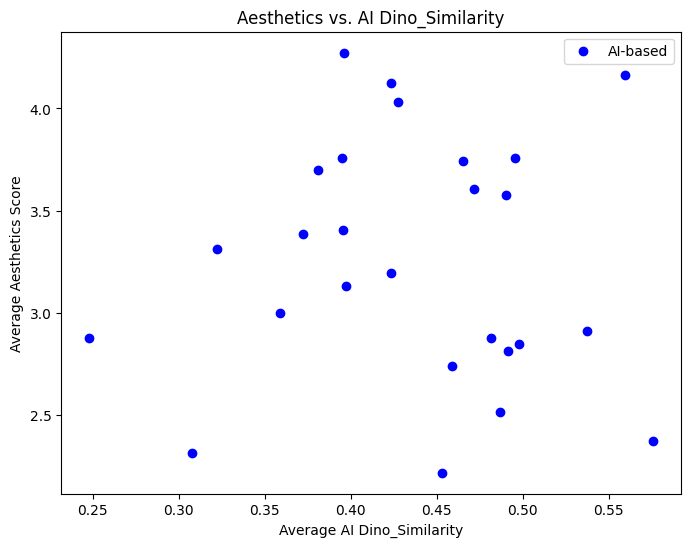

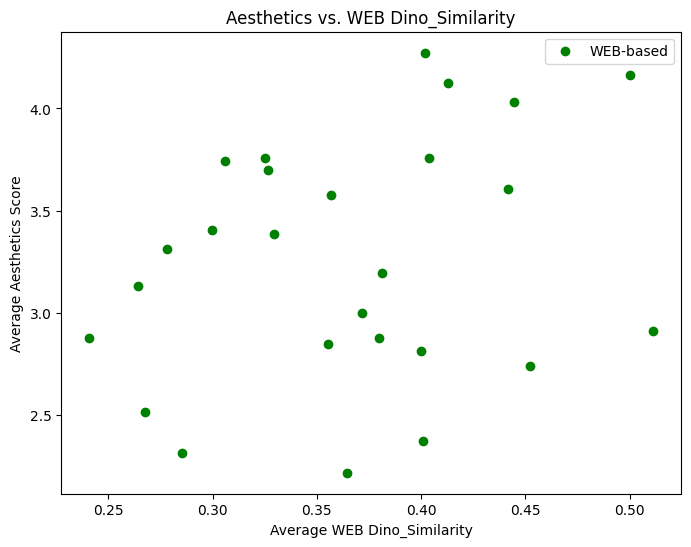

In [21]:
ai_valid = merged_df.dropna(subset=["AI"])
web_valid = merged_df.dropna(subset=["Web"])

plt.figure(figsize=(8, 6))
plt.scatter(ai_valid["AI"], ai_valid["aesthetics"], c='blue', label='AI-based')
plt.xlabel("Average AI Dino_Similarity")
plt.ylabel("Average Aesthetics Score")
plt.title("Aesthetics vs. AI Dino_Similarity")
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(web_valid["Web"], web_valid["aesthetics"], c='green', label='WEB-based')
plt.xlabel("Average WEB Dino_Similarity")
plt.ylabel("Average Aesthetics Score")
plt.title("Aesthetics vs. WEB Dino_Similarity")
plt.legend()
plt.show()